<a href="https://colab.research.google.com/github/xyd945/crypto_trading_learning/blob/main/volatility_analysis_trading_pair.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#install the gate api package
!pip install --user gate-api


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from gate_api import ApiClient, Configuration, Order, SpotApi


TOP 5 record  [0.0009532830949119585, 0.0008094133565285502, 0.0006216690909751098, 0.0005598632248121311, 0.0005486720327998663]


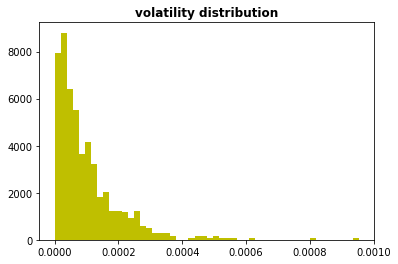

In [14]:
date_to = datetime.now()
date_from = date_to - timedelta(hours=12)

#set up api connection
configuration = Configuration(key="YOUR_KEY", secret="YOUR_KEY_SECRET", host="https://api.gateio.ws/api/v4")
client = ApiClient(configuration)
spot_api = SpotApi(client)

data = spot_api.list_candlesticks("BTC_USDT",
    _from=int(date_from.timestamp()),
    to=int(date_to.timestamp()),
    interval="1m")
x = [(float(i[5]) - float(i[4])) / float(i[2]) for i in data]

#we analyse the recent transaction price and also print out the top5 records to help us understand the volatility and choose the right spread

print("TOP 5 record ", sorted(x, key=None, reverse=True)[:5])
plt.hist(x, 50, density=True, stacked=True, histtype='bar', linewidth=3, color='y')
plt.title('volatility distribution', fontweight="bold") 
plt.show()